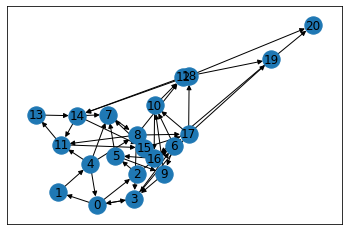

init position  0
>>>> total reward 0.0


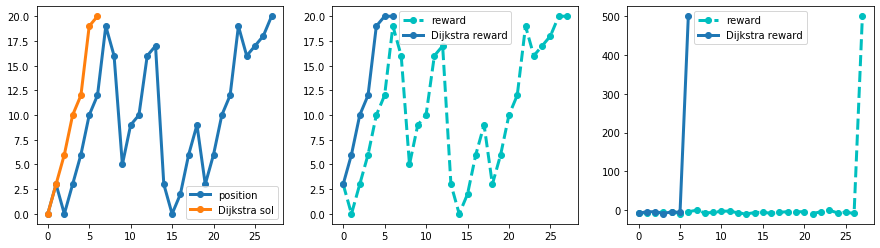

In [234]:
from __future__ import print_function
import matplotlib.pyplot as plt # librairie de plot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import pylab as plt
from numpy import linalg as LA
import networkx as nx
import random as rand
import copy as co

%run RL1_MDP.ipynb

# Algorithms for reinforcement learning

In this notebook, we will gives some theoretical results on the **optimal policy** and different algorithms based on these results which will allow to compute the policy.

We separate the algorithm in two classes:
 - **model-based** algorithm which used the fact that we known $P(.)$ (probability transition) and $R(.)$ (reward)
 - **model-free** which don't use this explicit construction of $P(.)$ and $R(.)$.

Currently we will focus on the case where $\mid S \mid$ and  $\mid A \mid$ the cardinal of state/action spaces are **finite and small**.

We will validate and test the differents algorithms on the previous example.

## Bellman theory and optimal policy

The fist point is theoric. We will define the notion of **optimal policy** and gives some characterizations to the **Value function** and **Q-function** for this optimal policy. 

These characterizations will be useful to design algorithms.

**Definition**: *we define the order relation on the **policy** by:*

$$
\pi(\mathbf{s}) \geq \pi^{'}(\mathbf{s}), \mbox{ if } V^{\pi}(\mathbf{s}) \geq V^{\pi^{'}}(\mathbf{s}), \quad \forall \mathbf{s}\in S
$$

**Definition**: *Following the previous order relation, the **optimal policy** $\pi^{*}(.)$ satisfy*

$$
V^{\pi^{*}}(\mathbf{s})= \operatorname{max}_{\pi} V^{\pi}(\mathbf{s}),\quad \forall \mathbf{s}\in S
$$

The definitions are valid for a stochastic policy

Now we will introduce the main result which characterise the **optimal policy**.

**Theorem (Characterization of Valuf function)**:

*We consider a Markovian stationnary policy $\pi$. For $\gamma<1$ the Value function $V_{\gamma}^{\pi}$ is the unique solution of*:

$$
V_{\gamma}^{\pi} = L_{\pi} V_{\gamma}^{\pi}
$$

*where the operator is given by*

$$
L_{\pi} = \mathbf{r}_{\pi}+ \gamma \mathbb{P}^{\pi}
$$

*with $(\mathbf{r}_{\pi}, \mathbb{P}^{\pi})$ are defined in the preivous notebook (depend if the policy is deteministic or stochastic).*


*Proof*
We consider the **Value function** at initial time

$$
V_{\gamma}^{\pi} =\mathbb{E}^{\pi}\left[\sum_{t=0}^{\infty}\gamma^k r_{t+1} \mid \mathbf{s}_0=\mathbf{s}\right]
$$

$$
V_{\gamma}^{\pi} =\mathbb{E}^{\pi}\left[\mathbf{r}_1+\gamma\mathbf{r}_2+\gamma_2 \mathbf{r}_3 + ... \mid \mathbf{s}_0=\mathbf{s}\right]
$$

$$
V_{\gamma}^{\pi} =\mathbb{E}^{\pi}\left[\mathbf{r}_1\mid \mathbf{s}_0=\mathbf{s}\right]+\gamma\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_0=\mathbf{s}\right]
$$

If the policy is deterministic $\mathbb{E}^{\pi}\left[\mathbf{r}_1\mid \mathbf{s}_0=\mathbf{s}\right]=R(\mathbf{s},\pi(\mathbf{s}))=\mathbf{r}_{pi}$ (see previous notebook). If the policy is stochastic, by definition of the esperance for discrete random variable we have:

$$
\mathbb{E}^{\pi}\left[\mathbf{r}_1\mid \mathbf{s}_0=\mathbf{s}\right] = \sum_{a}\pi(\mathbf{a},\mathbf{s})R(\mathbf{a},\mathbf{s}) =\mathbf{r}_{\pi}
$$

Here the policy $\pi(.\mid.)$ gives the probability of the value of random variable and $R(.,.)$ possible the value.

So in the two case we have:

$$
V_{\gamma}^{\pi} = \mathbf{r}_{\pi} +\gamma\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_0=\mathbf{s}\right]
$$


We want estimate $\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_0=\mathbf{s}\right]$, the esprance of the return with as first state $\mathbf{s}$. The cumulate return depend of this first state only by the transition between the first and second state $\mathbf{s}^{'}$ ( the returns depend of the second and next states), so:

$$
\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_0=\mathbf{s}\right] = \sum_{\mathbf{s}^{'}} \mathbb{P}^{\pi}(\mathbf{s}^{'}\mid \mathbf{s})\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_1=\mathbf{s}^{'}\right]
$$

with $\mathbb{P}^{\pi}$ define in thie previous notbook by the policy and the probability transition $p(.\mid.,.)$.

To finish we proof it is sufficient to note that $\mathbb{E}^{\pi}\left[\mathbf{r}_2+\gamma_1 \mathbf{r}_3 + ... \mid \mathbf{s}_1=\mathbf{s}^{'}\right]= V_{\pi}(\mathbf{s}^{'})$.

We have prove that $V_{\gamma}^{\pi}$ satisify :

$$
V_{\gamma}^{\pi} = L_{\pi} V_{\gamma}^{\pi}
$$

Now we prove that tis solution is unique. For that we rewrite the previous operator as

$$
\left( I_d -\gamma \mathbb{P}^{\pi}\right) V_{\gamma}^{\pi}= \mathbf{r}_{\pi}
$$

Since $\mathbb{P}^{\pi}$ is probability matrix all the eigenvalues are smaller or equal that one. If $\gamma<1$ it is the same for $\gamma \mathbb{P}^{\pi}$. Diagonalizing the matrix $\left( I_d -\gamma \mathbb{P}^{\pi}\right)$ in the basis of $\mathbb{P}^{\pi}$ we obtain that all the eigenvalues are strictly positive and consquently the matrix is invertible.

*end proof*

**Theorem (Bellman equation)**: *for $\gamma < 1$, the **Value-Function** $V^{\pi^*}(.)$ for the optimal policy satisfy the equation*:

$$
V^*(\mathbf{s})  = L V^*(\mathbf{s}) 
$$

 *with the operator*
 
 $$
 L V(\mathbf{s})  = \operatorname{max}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V(\mathbf{s}^{'})\right)
 $$
 
 By definition the optimal policy will construct using using the best action. Consequently we take
 
 $$
 \pi(\mathbf{s}) = \operatorname{argmax}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V(\mathbf{s}^{'})\right)
 $$

*Formal Proof*
Here we assume that the optimal policy exist.
By definition of the optimal policy we have:

$$
\displaystyle V^{*}(\mathbf{s}) =\operatorname{max}_{\pi} V_{\gamma}^{\pi} = \operatorname{max}_{\pi} \left(\mathbf{r}_{\pi}+ \gamma \mathbb{P}^{\pi} V_{\gamma}^{\pi}\right), \quad \forall \mathbf{s} \in S
$$

All the policy $\pi$ can be write as $(\mathbf{a},\pi^{'})$. In this case we choose an action $\mathbf{a}$ an after any policy $\pi^{'}$. In this case we have

$$
\displaystyle V^{*}(\mathbf{s}) =\operatorname{max}_{\pi} V_{\gamma}^{\pi} = \operatorname{max}_{(\mathbf{a},\pi^{'})} \left(\mathbf{r}_{\pi}+ \gamma \mathbb{P}^{\pi} V_{\gamma}^{\pi}\right), \quad \forall \mathbf{s}\in S
$$

sinc the first action is $\mathbf{a}$ we have:

$$
\displaystyle V^{*}(\mathbf{s}) =\operatorname{max}_{\pi} V_{\gamma}^{\pi} = \operatorname{max}_{(\mathbf{a},\pi^{'})} \left(R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_{\gamma}^{\pi^{'}}(\mathbf{s}^{'})\right), \quad \forall \mathbf{s}\in S
$$

Since thr reward and the probability transition does not depend of $\pi^{'}$ we obtain

$$
\displaystyle V^{*}(\mathbf{s})  = \operatorname{max}_{\mathbf{a}} \left(R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) \operatorname{max}_{\pi^{'}} V_{\gamma}^{\pi^{'}}(\mathbf{s}^{'})\right), \quad \forall \mathbf{s}\in S
$$

which gives by definition of the optimal value 


$$
\displaystyle V^{*}(\mathbf{s})  = \operatorname{max}_{\mathbf{a}} \left(R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V^{*}(\mathbf{s}^{'})\right), \quad \forall \mathbf{s}\in S
$$

*end Proof*

**Existance and uniquness**

We call the space of the value function $V(.)$. Since it is a finite dimensional space it is a **complet vectorial space**. We are in a **Bannach space** so we can apply the **fixed point theorem** to obtain the existence and uniqueness of $V = L V$.

**Theorem:** *The operator $L$ is a **contracting operator** for the infinity norm*. 

*proof*

$$
\mid V(\mathbf{s}) - U(\mathbf{s}) \mid \leq \mathrel{\bigg|}  \operatorname{max}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V(\mathbf{s}^{'})\right) -\operatorname{max}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) U(\mathbf{s}^{'})\right) \mathrel{\bigg|}
$$

The maximum is a norm for vectorial space. Consequently we have $\parallel \mathbf{x} \parallel-\parallel \mathbf{y} \parallel< \parallel \mathbf{x}-\mathbf{y} \parallel$. So we have

$$
\mid V(\mathbf{s}) - U(\mathbf{s}) \mid \leq \operatorname{max}_{\mathbf{a}} \mathrel{\bigg|}  \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V(\mathbf{s}^{'})\right) - \left( R(\mathbf{s},\mathbf{a})+ \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) U(\mathbf{s}^{'})\right) \mathrel{\bigg|}
$$

$$
\mid V(\mathbf{s}) - U(\mathbf{s}) \mid \leq \gamma \operatorname{max}_{\mathbf{a}} \mathrel{\bigg|} \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) \left(V(\mathbf{s}^{'}) - U(\mathbf{s}^{'})\right) \mathrel{\bigg|}
$$

Since tbe value function does not depend of the action. We have:

$$
\mid V(\mathbf{s}) - U(\mathbf{s}) \mid \leq \gamma \parallel V - U\parallel_{\infty}\operatorname{max}_{\mathbf{a}}\sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) = \gamma \parallel V(\mathbf{s}^{'}) - U(\mathbf{s}^{'})\parallel_{\infty}
$$

It is true for all state. So we have

$$
 \parallel LV - LU\parallel_{\infty} = \operatorname{max}_{\mathbf{s}} \mid V(\mathbf{s}) - U(\mathbf{s}) \mid \leq \gamma \parallel V - U\parallel_{\infty}
$$

*end proof*

**Corollary**: *There is a unique solution to the problem: $V = LV$*

**Corollary (Bellman equation)**: *for $\gamma < 1$, the **Q-Function** $Q^{\pi^*}(.,.)$ for the optimal policy satisfy the equation*:

$$
Q^*(\mathbf{s},\mathbf{a})  = L_2 Q^*(\mathbf{s},\mathbf{a}) 
$$

 with the operator
 
$$
 L_2 Q(\mathbf{s},\mathbf{a})  = \left( R(\mathbf{s},\mathbf{a}) + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) \operatorname{max}_{\mathbf{a}^{'}} Q(\mathbf{s}^{'},\mathbf{a}^{'})\right)
 $$


 
 **Corollary**: *the optimal Value function is given by*
 $$
 V^{*}(\mathbf{s})= \operatorname{max}_{\mathbf{a}} Q^*(\mathbf{s},\mathbf{a}) 
 $$
 
 *and*
 
 $$
 \pi^{*}(\mathbf{s})= \operatorname{argmax}_{\mathbf{a}} Q^*(\mathbf{s},\mathbf{a}) 
 $$
 
 The $Q$-function have the advantage to gives directly the policy without the probability transition. 

## Dynamic Programming and Model-Based algorithms

The algorithms proposed here, solve Bellman's optimality equation with iterative solver. These algorithms used a perfect knownledge of the environmenent: probability transition $P(.\mid .,.)$ and rewards $R(.,.)$. It is why we speak about **Model-based** algorithms. In the other case (next notebook) we speak about **Model_free** algorithms.

This familly of models proposed in the following is called **dynamic programming**.

**Model-based** methods rely on **planning** as
their primary component, while **Model-free** methods primarily rely on **learning**

### Value iterate algorithm

The idea is to solve the fixed point equation on the **Value-function** using a classical **Picard iterator**. After that, we compute the policy unsing the function $V^{*}$ obtained. 



**Algorithm (Value iteration)**:
- Initialize with $V_0$ the value function,
- n= 0
- such that $\mid V_{n+1}-V_n\mid > \varepsilon$:
 - for all $\mathbf{s}\in S$:
     - $V_{n+1}=\operatorname{max}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a}) + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$
 - $n = n+1$
- for all $\mathbf{s}\in S$:
 - $\pi(\mathbf{s})= \operatorname{argmax}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a}) + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$
 
This algorithm can be view as **Picard iterator for the Bellmann equation**.
 
The policy is constructed taking the action maximizing the optimal **Value-function** which satisfy the Bellman equation.

In [240]:
 class Value_iteration:
        def __init__(self,in_env,gamma,eps,itermax):
            self.env = in_env
            self.epsilon =eps
            self.max = itermax
            self.V = np.zeros(self.env.size())
            self.pi = np.zeros(self.env.size(),dtype=int)
            self.gamma =gamma
            
        def iterator(self):
            n = 0
            error = 10000.0                  
            self.env.set_action_i(0)
            while error > self.epsilon and n <self.max :
                
                Vtemp = co.copy(self.V)
                for i in range(0,self.env.size()):
                    self.env.set_state_i(i) ## we put the state i in the env
                    is_final = self.env.final_state()
                    set_a = env.available_action(self.env.s0) ##  we take the set of possible action
                    maxv=-100000.0
                    for j in range(0,len(set_a)): ## loop of possible action
                        self.env.set_action_i(set_a[j])
                        reward, new_state = self.env.compute_update(self.env.a0) 
                        ins = new_state.index()
                        if is_final == False:
                            maxv = max(maxv,reward+self.gamma*Vtemp[ins]) ## compute max on available action
                        else:
                            maxv = reward
                    self.V[i] = maxv ## update V
                error = LA.norm((self.V-Vtemp), np.inf)
                n= n+1
            return n
                    
        def compute_policy(self):
            for i in range(0,self.env.size()):
                self.env.set_state_i(i) ## we pu the stat i in the env
                set_a = env.available_action(self.env.s0) ##  we take the set of possible action
                maxv=-100000.0
                index = 0
                for j in range(0,len(set_a)): ## loop of possible action
                    self.env.set_action_i(set_a[j])
                    reward, new_state = self.env.compute_update(self.env.a0) 
                    ins = new_state.index()
                    if reward+self.gamma*self.V[ins] > maxv: 
                        maxv = reward+self.gamma*self.V[ins]
                        index = set_a[j]   
                self.pi[i] = int(index) 

### Policy iterate algorithm

In the previous algorithm, we construct the **Value function** which allows to evaluate the policy. The policy is constructed after, using the **Value-function**.

Another strategy, is constructed with an iterative algorithm, directly the **policy**.
This algorithm is close to the previous one, but construct an **policy** at each iteration of the **Value-function** and note at the end.

**Algorithm (Policy iteration)**:
- Initialize with $\pi_0$ the policy function,
- n= 0
- such that $\mid \pi_{n+1}-\pi_n\mid < \varepsilon$:
 - We solve:
     - we select the action with the policy $\mathbf{a}=\pi_n(\mathbf{s})$,
     - $V_{n}= \left( R(\mathbf{s},\mathbf{a}) + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$
 - for all $\mathbf{s}\in S$:
     - $\pi_{n+1}(\mathbf{s})= \operatorname{argmax}_{\mathbf{a}} \left( R(\mathbf{s},\mathbf{a}) + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$
  - n = n+1
 
The problem of this method is the invesion of the matrix: $I_d-L$. To avoid the construction and the inversion of the matrix $I_d-L$ a **modified** algorithm proposed to solve this linear system with a Picard solver (as for the Value-iterator algorithm) with few iterations.

**Algorithm (Modified Policy iteration)**:
- Initialize with $V_0$ with $LV_0 \geq V_0$, $flag = 0$, $n = 0$
- such that $flag=0$:
 - for all $\mathbf{s}\in S$:
     - $\pi(\mathbf{s})= \operatorname{argmax}_{\mathbf{a}} \left( \mathbf{r}_t + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$ 
     - $V_n^0 = \operatorname{max}_{\mathbf{a}} \left( \mathbf{r}_t + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n(\mathbf{s}^{'})\right)$   
 - $m=0$, if $\mid V_n^0-V_n\mid  \leq \epsilon$, $flag=1$, else:
     - such that $\mid V_n^{m+1}-V_n^{m}\mid \leq \delta$:
         - for all $\mathbf{s}\in S$:
             -  $V_{n}^{m+1}=\operatorname{max}_{\mathbf{a}} \left( \mathbf{r}_t + \gamma \sum_{\mathbf{s}^{'}}P(\mathbf{s}^{'} | \mathbf{s},\mathbf{a}) V_n^m(\mathbf{s}^{'})\right)$
         - $m = m+1$
     - $V_n = V_n^{m}$
     - $n = n +1$

In general the **Modified Policy iteration** is known as more efficient that the **Value iteration** function.

It's not necessarily the case in our example.

In [241]:
 class Policy_iteration:
    def __init__(self,in_env,gamma,eps,itermax):
        self.env = in_env
        self.epsilon =eps
        self.delta = 0.1
        self.max = itermax
        self.V = np.zeros(self.env.size())
        self.pi = np.zeros(self.env.size(),dtype=int)
        self.gamma =gamma
            
    def iterator(self):
        n = 0; flag =0
        error = 10000.0                  
        
        while flag==0 and n <self.max :
            V0= np.zeros(self.env.size())
            for i in range(0,self.env.size()):
                self.env.set_state_i(i) ## we pu the stat i in the env
                is_final = self.env.final_state()
                set_a = env.available_action(self.env.s0) 
                maxv=-100000.0
                index = 0
                Vpred=0.0 
                for j in range(0,len(set_a)): ## loop of possible action
                    self.env.set_action_i(set_a[j])
                    reward, new_state = self.env.compute_update(self.env.a0) 
                    ins = new_state.index()

                    if is_final == True:
                        Vpred = reward
                    else: 
                        Vpred = reward+self.gamma*self.V[ins]
         
                    if Vpred > maxv: 
                        maxv = Vpred
                        index = set_a[j]  
                        
                V0[i] = maxv
                self.pi[i] = int(index)           
                    
            m = 0; error = LA.norm((self.V-V0), np.inf)
            if error < self.epsilon:
                flag = 1
            else:
                errorm = 1000.0
                while errorm > self.delta :  
                    Vtemp = co.copy(V0)
                    for i in range(0,self.env.size()):
                        self.env.set_state_i(i) ## we pu the stat i in the env
                        set_a = env.available_action(self.env.s0) 
                        self.env.set_action_i(self.pi[i])
                        reward, new_state = self.env.compute_update(self.env.a0) 
                        ins = new_state.index()
                        if self.env.final_state() == True:
                            V0[i] = reward
                        else:                       
                            V0[i] = reward+self.gamma*Vtemp[ins]
                    m = m+1
                    errorm = LA.norm((V0-Vtemp), np.inf) 
                    
                self.V= co.copy(V0)
                flag=0
            n = n+1
            
        return n
    

### Validation and comparison

In [245]:
def compute_iteration_value(method="Value",gamma=0.95,s0=0):
    env = environment(goal,G)
    print("fnnfj",gamma)
    if method=="Value":
        v1 = Value_iteration(env,gamma,0.0001,1000)
        ncv = v1.iterator()
        v1.compute_policy()
    else:
        v1 = Policy_iteration(env,gamma,0.0001,1000)
        ncv = v1.iterator()
    print(">>> iteration to converge for gamma >>>",gamma," is >>>",ncv)
    
    env = environment(goal,G)
    env.reseti(0)
    n = 0
    monitor = callback(env)
    final_state = env.final_state()

    print("init position ",env.s0.value())
    while final_state == False and n <200:
        env.set_action_i(v1.pi[env.s0.index()])
        state, reward, new_state =env.update(env.a0)
        monitor.update(n,state,env.a0,reward)
        n=n+1
        final_state = env.final_state()
    
    env.set_action_i(v1.pi[env.s0.index()])
    state, reward, new_state =env.update(env.a0)
    monitor.update(n,state,env.a0,reward)    
    
    monitor.plot()
    print(">>>> total reward",monitor.total_reward())

    ##### non appplying policy
    env2 = environment(goal,G)
    env2.reseti(0)
    n = 0
    monitor2 = callback(env2)
    final_state2 = env2.final_state()

    print("init position ",env2.s0.value())
    while final_state2 == False and n <200:
        set_a = env2.available_action(env2.s0)
        env2.set_action_i(int(np.random.choice(set_a)))
        state,reward, new_state =env2.update(env2.a0)
        monitor2.update(n,state,env2.a0,reward)
        n=n+1
        final_state2 = env2.final_state()
    
    set_a = env2.available_action(env2.s0)
    env2.set_action_i(np.random.choice(set_a))
    state, reward, new_state =env.update(env2.a0)
    monitor2.update(n,state,env2.a0,reward)    
    
    monitor2.plot()
    print(">>>> total reward",monitor2.total_reward())

In [246]:
method = widgets.RadioButtons(options=['Value','Policy'],value='Value',description="method:")
s0 = widgets.IntText(value=0,description="initial position")
gamma = widgets.FloatSlider(value=0.95,min=0.0,max=1.0,step=0.05,description="Gamma:")
b1 = widgets.HBox([method,gamma,s0])

ui= widgets.VBox([b1])
out = widgets.interactive_output(compute_iteration_value, {'method': method, 'gamma': gamma, 's0': s0})


In [247]:
display(ui,out)

Output(outputs=({'output_type': 'stream', 'text': 'fnnfj 0.95\n>>> iteration to converge for gamma >>> 0.95  i…